## Moore's Law

### Getting the Data Pre-Processed

In [1]:
import re
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv

--2024-01-21 16:39:24--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5798 (5.7K) [text/plain]
Saving to: 'moore.csv'

     0K .....                                                 100% 3.22M=0.002s

2024-01-21 16:39:24 (3.22 MB/s) - 'moore.csv' saved [5798/5798]



In [2]:
X = []
Y = []

In [6]:
non_decimal = re.compile(r'[^\d]+')

In [12]:
for line in open('moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

### Moore's Law Data - Exponential to Linear

In [14]:
X = np.array(X)
Y = np.array(Y)

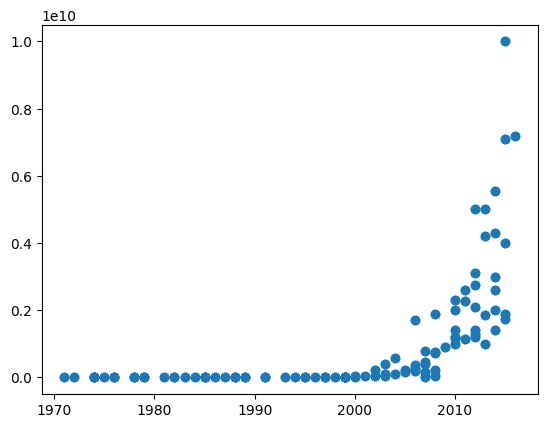

In [15]:
plt.scatter(X,Y)
plt.show()

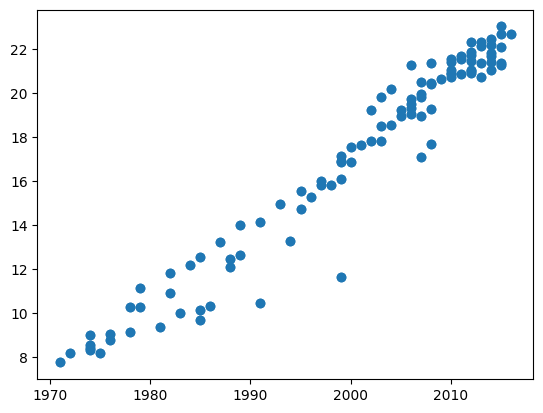

In [16]:
Y = np.log(Y)
plt.scatter(X,Y)
plt.show()

### Linear Regression!

In [17]:
Denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean()* X.sum())/Denominator
b = (Y.mean() * X.dot(X) - X.mean()*X.dot(Y))/Denominator

In [18]:
Yhat = a*X + b

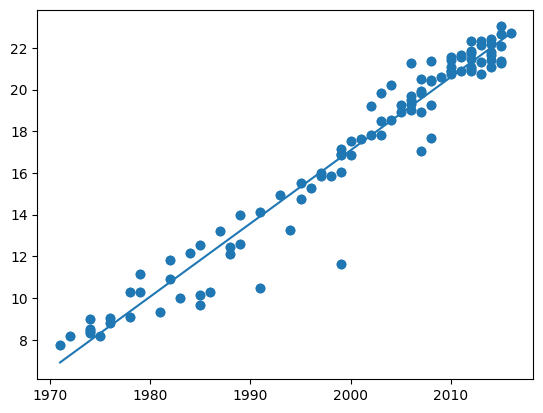

In [19]:
plt.scatter(X,Y)
plt.plot(X,Yhat)
plt.show()

### Computing Accuracy by R-Squared Method

In [20]:
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1)/d2.dot(d2)

In [21]:
print("a:", a, "b:", b)
print("the r-squared is:", r2)

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576


### How Long Does it Take For Transistor Count to Double!

In [22]:
# log(tc) = a*year + b
# tc = exp(b) * exp(a *year)
# 2*tc = 2.exp(b)*exp(a*year)
#      = exp(ln(2))* exp(b) * exp(a*year)
#      = exp(b)* exp(a*year + ln(2))
# this Means
# exp(b)* exp(a*year2) = exp(b)* exp(a*year1 + ln(2))
# i.e. a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a

In [23]:
print("time to double", np.log(2)/a, "years")

time to double 1.9745331723797188 years
